# Predicting Red Hat Business Value

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
BASE_DIR = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))
DIR = os.path.join(os.path.join(BASE_DIR,'Dataset'),'Red Hat')

In [28]:
people = pd.read_csv(os.path.join(DIR,'people.csv'))
activity = pd.read_csv(os.path.join(DIR,'act_train.csv'))

In [29]:
print 'Number of samples in peoples: {}'.format(len(people.index))
print 'Number of samples in activity: {}'.format(len(activity.index))
print 'Number of features in people: {}'.format(len(people.columns))
print 'Number of features in activity: {}'.format(len(activity.columns))

Number of samples in peoples: 189118
Number of samples in activity: 2197291
Number of features in people: 41
Number of features in activity: 15


In [30]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [31]:
people.columns = ['people_id','people_char_1','people_group_1','people_char_2','people_date']+\
['people_char_{}'.format(i) for i in range(3,len(people.columns)-2)]
people.head()

,people_id,people_char_1,people_group_1,people_char_2,people_date,people_char_3,people_char_4,people_char_5,people_char_6,people_char_7,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,...,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,...,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,...,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,...,False,False,True,False,False,False,True,True,False,84


In [32]:
activity.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [33]:
people_activity = activity.merge(people,on='people_id',how='inner')

In [34]:
people_activity.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [35]:
people_act_type1,people_act_not_type1 = people_activity[people_activity['activity_category'] == 'type 1'],\
people_activity[people_activity['activity_category'] != 'type 1']

In [36]:
people_act_type1.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
52,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,...,False,False,False,False,False,False,False,False,False,76
105,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0
106,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,...,False,False,False,False,False,False,False,False,False,0
107,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,...,False,False,False,False,False,False,False,False,False,0
108,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0


In [37]:
people_act_not_type1.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [38]:
people_act_type1 = people_act_type1.drop(labels = ['char_10'],axis=1)
people_act_not_type1 = people_act_not_type1.drop(labels = ['char_{}'.format(i) for i in range(1,10)],axis=1)

In [39]:
people_act_not_type1 = people_act_not_type1.reset_index(drop=True)
people_act_type1 = people_act_type1.reset_index(drop=True)

In [40]:
people_act_type1.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,...,False,False,False,False,False,False,False,False,False,76
1,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0
2,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,...,False,False,False,False,False,False,False,False,False,0
3,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,...,False,False,False,False,False,False,False,False,False,0
4,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0


In [41]:
people_act_not_type1.head()

,people_id,activity_id,date,activity_category,char_10,outcome,people_char_1,people_group_1,people_char_2,people_date,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36


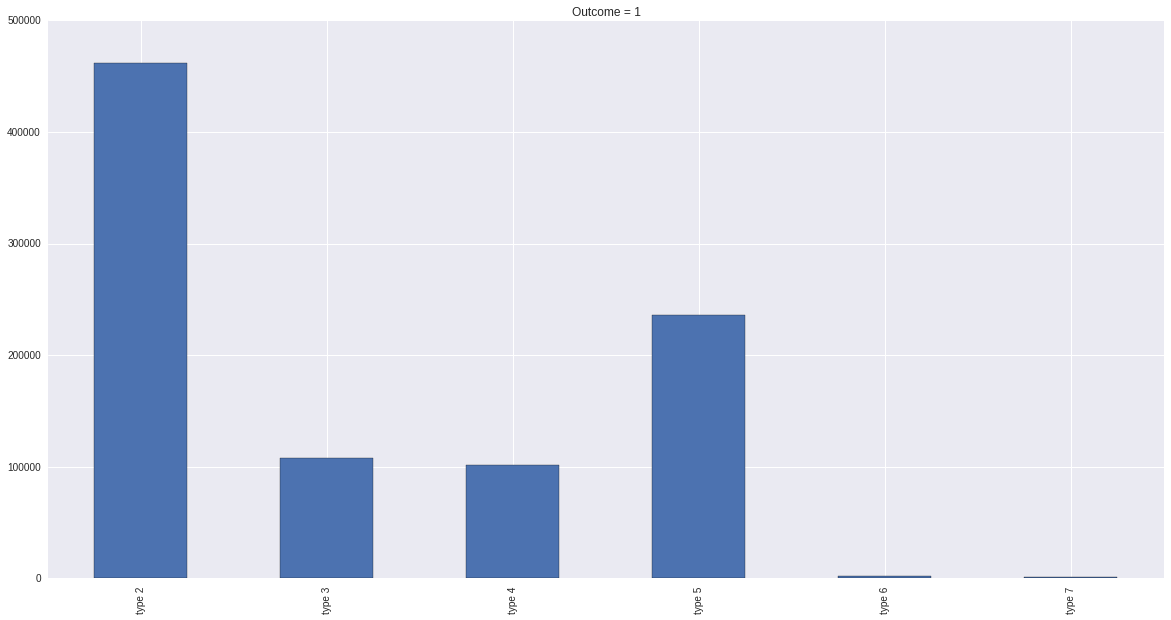

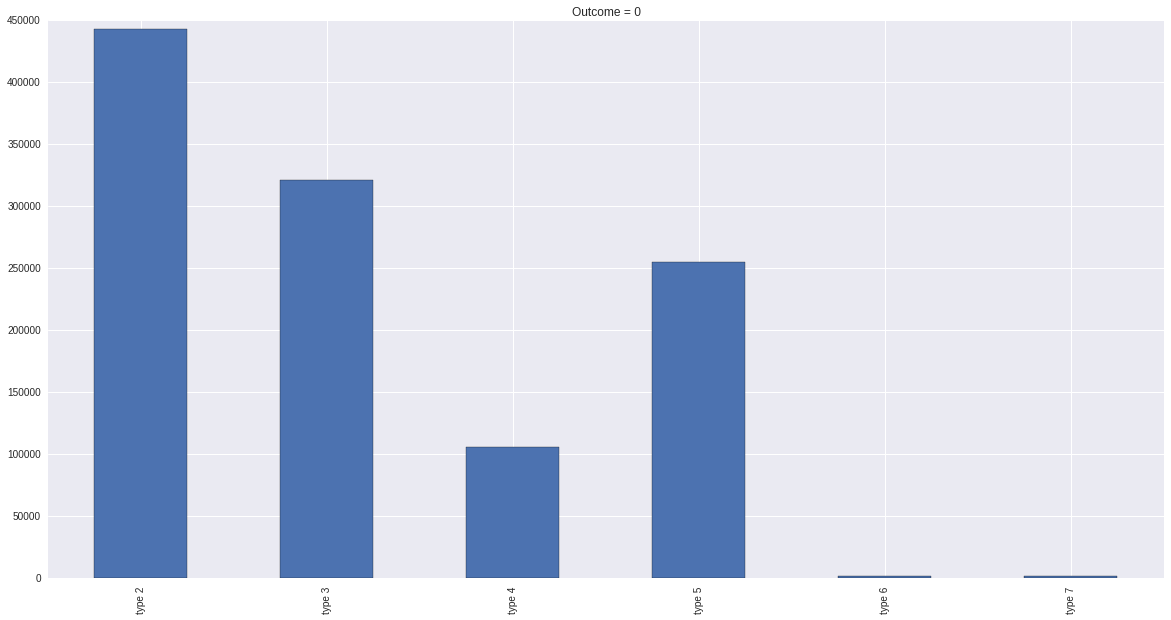

In [42]:
from collections import Counter
pd.Series(Counter(people_act_not_type1[people_act_not_type1['outcome'] == 1]['activity_category'])).\
plot(kind='bar',figsize=(20,10))
plt.title('Outcome = 1')
plt.show()
pd.Series(Counter(people_act_not_type1[people_act_not_type1['outcome'] == 0]['activity_category'])).\
plot(kind='bar',figsize=(20,10))
plt.title('Outcome = 0')
plt.show()

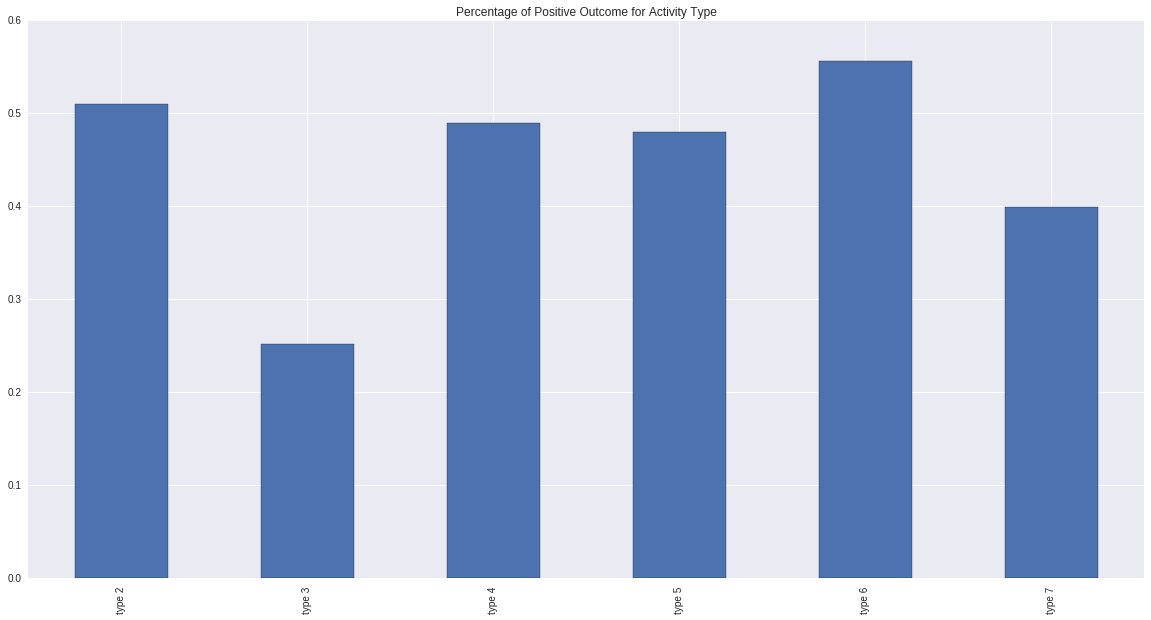

In [43]:
pd.Series(pd.Series(Counter(people_act_not_type1[people_act_not_type1['outcome'] == 1]['activity_category']))/\
pd.Series(Counter(people_act_not_type1['activity_category']))).plot(kind='bar',figsize=(20,10))
plt.title('Percentage of Positive Outcome for Activity Type')

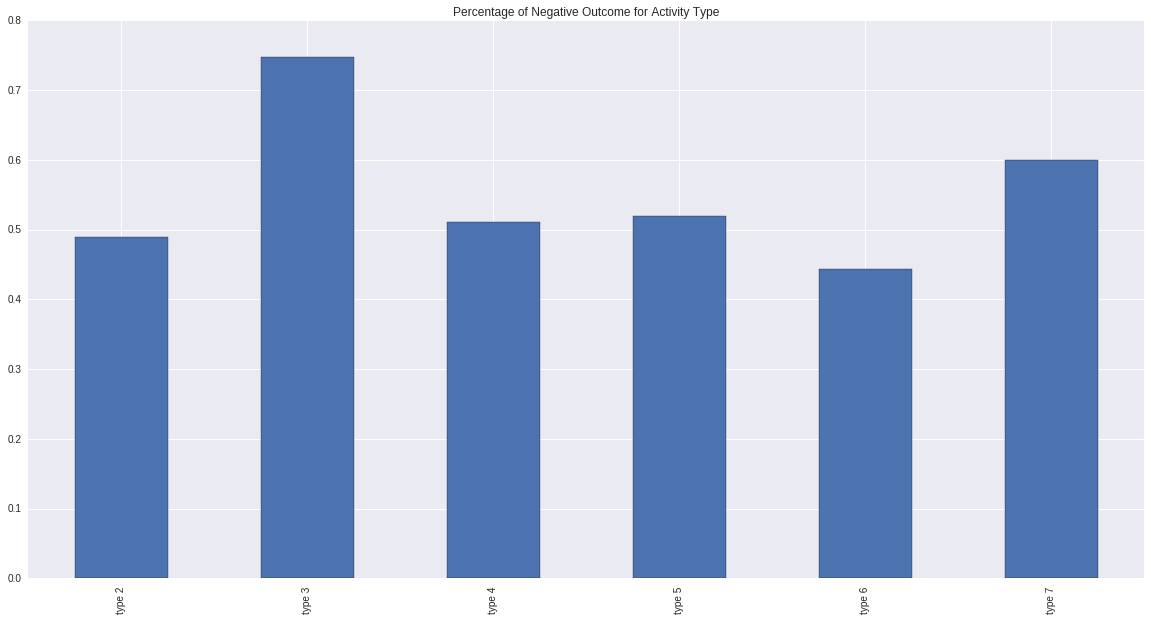

In [44]:
pd.Series(pd.Series(Counter(people_act_not_type1[people_act_not_type1['outcome'] == 0]['activity_category']))/\
pd.Series(Counter(people_act_not_type1['activity_category']))).plot(kind='bar',figsize=(20,10))
plt.title('Percentage of Negative Outcome for Activity Type')

## Training on the 'type 1' of the data

In [74]:
df = people_act_type1.copy()
df.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100025,act1_9923,2022-11-25,type 1,type 3,type 5,type 1,type 1,type 6,type 3,...,False,False,False,False,False,False,False,False,False,76
1,ppl_100033,act1_198174,2022-07-26,type 1,type 36,type 11,type 5,type 1,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0
2,ppl_100033,act1_214090,2023-06-15,type 1,type 24,type 6,type 6,type 3,type 1,type 3,...,False,False,False,False,False,False,False,False,False,0
3,ppl_100033,act1_230588,2023-02-28,type 1,type 2,type 2,type 3,type 3,type 5,type 2,...,False,False,False,False,False,False,False,False,False,0
4,ppl_100033,act1_271874,2022-07-26,type 1,type 2,type 5,type 3,type 2,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0


In [75]:
df = df.drop(labels = ['activity_category','people_id','activity_id'],axis=1)

In [76]:
df.date = pd.to_datetime(df.date)

In [77]:
for i in range(1,10):
    df['char_{}'.format(i)] = df['char_{}'.format(i)].astype("category").cat.codes

In [78]:
for i in range(1,39):
    df['people_char_{}'.format(i)] = df['people_char_{}'.format(i)].astype("category").cat.codes

In [79]:
df['people_group_1'] = df['people_group_1'].astype("category").cat.codes

In [80]:
df['people_date'] = pd.to_datetime(df['people_date'])

In [81]:
df1 = df.drop(labels = ['date','people_date'],axis=1)

In [82]:
from pandas.tools.plotting import andrews_curves

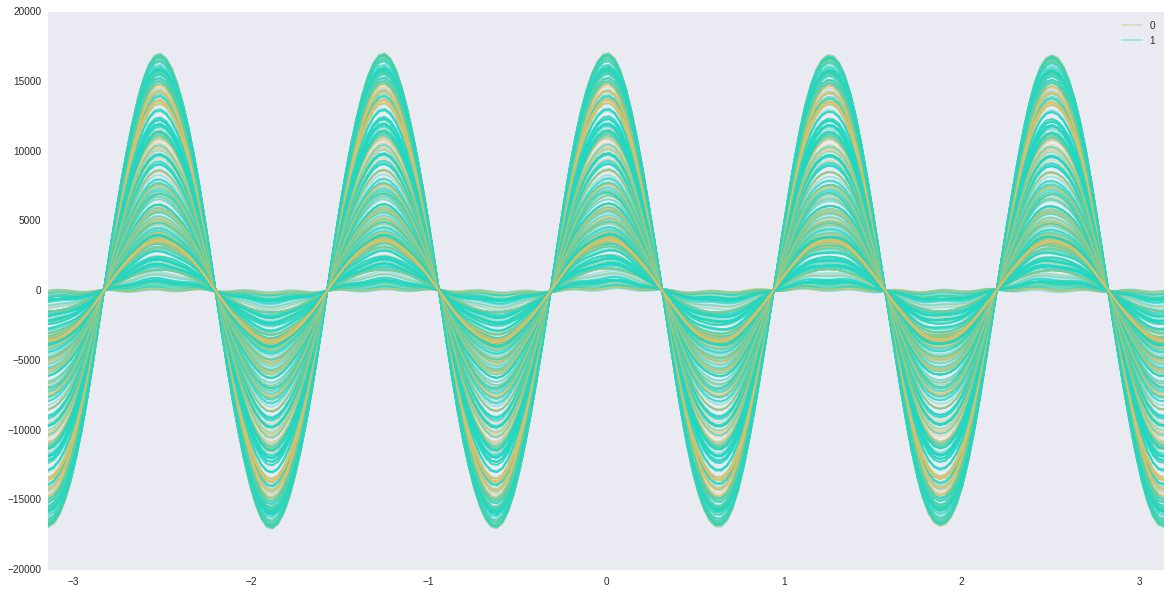

In [83]:
andrews_curves(df1.head(1000),'outcome',figsize(20,10),alpha=0.4)

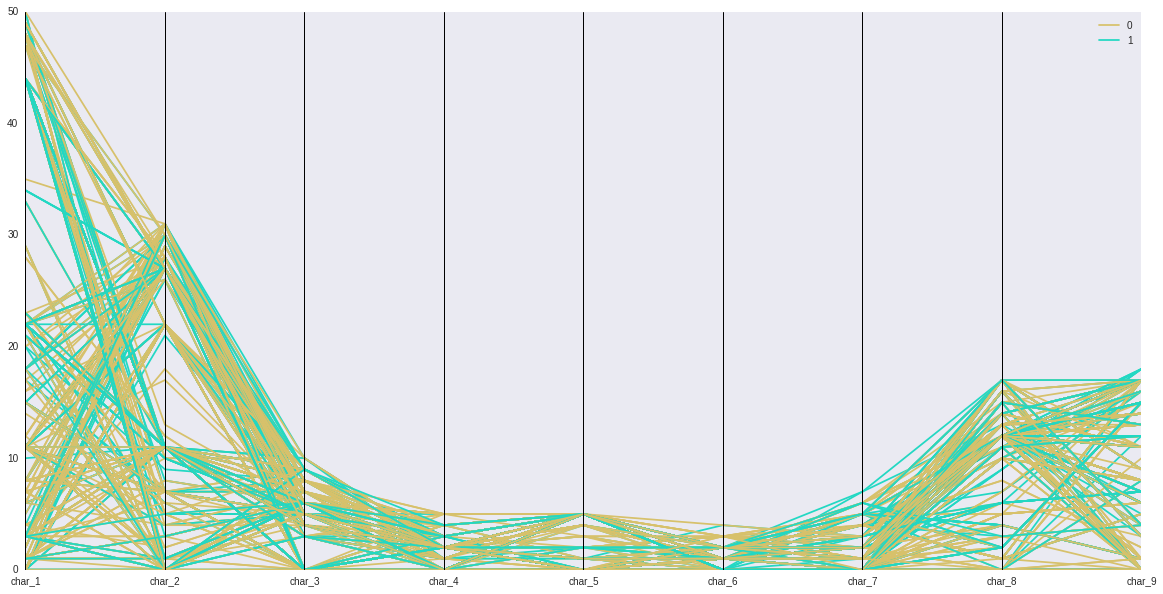

In [84]:
from pandas.tools.plotting import parallel_coordinates
df2 = df1.drop(labels = ['people_group_1','people_char_38'],axis=1)
parallel_coordinates(df2.iloc[:,0:10].head(1000),'outcome')

In [85]:
### Training for type 1 type of activity
df_train = df.drop(labels = ['date','people_group_1','people_date'],axis=1)
y_train = df_train['outcome'].values
y_train.shape
df_train = df_train.drop(labels=['outcome'],axis=1)

In [86]:
### df = pd.get_dummies(df,columns=['vertebrates'])
df_train = pd.get_dummies(df_train,columns=['char_{}'.format(i) for i in range(1,10)])

In [87]:
df_train = pd.get_dummies(df_train,columns=['people_char_{}'.format(i) for i in range(1,39)])

In [88]:
X = df_train.values
print X.shape

(157615, 445)


### Using PCA for dimensionality reduction

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [61]:
pca.fit(df_train)
T = pca.transform(df_train)
print T.shape

(157615, 100)


In [62]:
pca.explained_variance_ratio_.sum()

0.91246527532912536

In [63]:
del df_train,df,df1
gc.collect()

39

### Training on non-reduced data

In [64]:
X_train = X[0:100000,:]
y = y_train[0:100000]
X_cv = X[100000:,:]
y_cv = y_train[100000:]
print X_train.shape,y.shape
print X_cv.shape,y_cv.shape

(100000, 445) (100000,)
(57615, 445) (57615,)


In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators=500)

In [67]:
rfc.fit(X_train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [68]:
yPred = rfc.predict(X_cv)

In [69]:
print 'Accuracy on the cross-validation set {}%'.format((yPred == y_cv).mean()*100)

Accuracy on the cross-validation set 87.3383667448%


In [70]:
yPred_train = rfc.predict(X_train)

In [71]:
print 'Accuracy on the training set {}%'.format((yPred_train == y).mean()*100)

Accuracy on the training set 99.714%


In [72]:
del X,X_train,X_cv
gc.collect()

403

### Training on the PCA reduced data

In [47]:
T_train = T[0:100000,:]
T_cv = T[100000:,:]
print T_train.shape,y.shape

(100000, 100) (100000,)


In [48]:
rfc_pca = RandomForestClassifier(n_estimators=100)
rfc_pca.fit(T_train,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
print 'Accuracy on the cross-validation set {}%'.format(rfc_pca.score(T_cv,y_cv)*100)

Accuracy on the cross-validation set 85.5471665365%


In [50]:
del T_cv,T_train,T
gc.collect()

195

## Training on 'not type 1' data

In [51]:
df_not = people_act_not_type1.copy()

In [52]:
df_not.head()

,people_id,activity_id,date,activity_category,char_10,outcome,people_char_1,people_group_1,people_char_2,people_date,...,people_char_29,people_char_30,people_char_31,people_char_32,people_char_33,people_char_34,people_char_35,people_char_36,people_char_37,people_char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,type 76,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,type 1,0,type 2,group 17304,type 2,2021-06-29,...,False,True,True,False,False,True,True,True,False,36


In [53]:
df_not_1 = df_not.drop(labels = ['people_id','activity_id','date','people_date'],axis=1)

In [54]:
df_not_1 = pd.get_dummies(df_not_1,columns = ['activity_category'])

In [55]:
df_not_1['people_group_1'] = df_not_1['people_group_1'].astype("category").cat.codes
df_not_1['char_10'] = df_not_1['char_10'].astype("category").cat.codes

In [56]:
df_not_1 = pd.get_dummies(df_not_1,columns=['people_char_{}'.format(i) for i in range(1,39)])

In [57]:
y_not_train = df_not_1['outcome'].values
print y_not_train.shape
df_not_train = df_not_1.drop(labels=['outcome'],axis=1)

(2039676,)


In [58]:
X = df_not_train.values
X_train = X[0:2000000,:]
y_train = y_not_train[0:2000000]
X_cv = X[2000000:,:]
y_cv = y_not_train[2000000:]
print X_train.shape,y_train.shape
print X_cv.shape,y_cv.shape

(2000000, 296) (2000000,)
(39676, 296) (39676,)


In [59]:
del df_not,df_not_1,df_not_train
gc.collect()

83

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [55]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
yPred_train = rfc.predict(X_train)

In [59]:
print 'Training Set Accuracy {}%'.format((yPred_train == y_train).mean()*100)

Training Set Accuracy 98.31895%


In [60]:
yPred_cv = rfc.predict(X_cv)

In [61]:
print 'CV Set Accuracy {}%'.format((yPred_cv == y_cv).mean()*100)

CV Set Accuracy 89.0084685956%


In [62]:
del X,X_train,X_cv,y_cv,y_not_train,y_train
gc.collect()

78

## Training on PCA Reduced Data

In [65]:
from sklearn.decomposition import RandomizedPCA
pca_new = RandomizedPCA(n_components=100)

In [68]:
## Taking too long to fit the dataset

## Deleting people_char_1 to people_char_37 in 'type 1' data

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157615 entries, 0 to 157614
Data columns (total 49 columns):
char_1            157615 non-null int8
char_2            157615 non-null int8
char_3            157615 non-null int8
char_4            157615 non-null int8
char_5            157615 non-null int8
char_6            157615 non-null int8
char_7            157615 non-null int8
char_8            157615 non-null int8
char_9            157615 non-null int8
outcome           157615 non-null int64
people_char_1     157615 non-null int8
people_group_1    157615 non-null int16
people_char_2     157615 non-null int8
people_char_3     157615 non-null int8
people_char_4     157615 non-null int8
people_char_5     157615 non-null int8
people_char_6     157615 non-null int8
people_char_7     157615 non-null int8
people_char_8     157615 non-null int8
people_char_9     157615 non-null int8
people_char_10    157615 non-null int8
people_char_11    157615 non-null int8
people_char_12    157615 non-

In [90]:
df1.drop(labels = ['people_char_{}'.format(i) for i in range(1,38)],axis=1,inplace=True)

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157615 entries, 0 to 157614
Data columns (total 12 columns):
char_1            157615 non-null int8
char_2            157615 non-null int8
char_3            157615 non-null int8
char_4            157615 non-null int8
char_5            157615 non-null int8
char_6            157615 non-null int8
char_7            157615 non-null int8
char_8            157615 non-null int8
char_9            157615 non-null int8
outcome           157615 non-null int64
people_group_1    157615 non-null int16
people_char_38    157615 non-null int8
dtypes: int16(1), int64(1), int8(10)
memory usage: 3.0 MB


In [93]:
y = df1['outcome']

In [94]:
df1.drop(labels=['outcome'],axis=1,inplace=True)

In [98]:
X = df1.values
print X.shape,y.shape

(157615, 11) (157615,)


In [99]:
from sklearn.cross_validation import train_test_split
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.33)
print X_train.shape,y_train.shape
print X_cv.shape,y_cv.shape

(105602, 11) (105602,)
(52013, 11) (52013,)


In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

In [105]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [106]:
print rfc.score(X_train,y_train)

0.999034109202


In [107]:
print rfc.score(X_cv,y_cv)

0.894737853998


### Changing the parameters of the Random Forest

In [108]:
### min_samples_split = 2,200
### min_samples_leaf = 0.6 % of training data
from sklearn.grid_search import GridSearchCV

In [130]:
estimator = {'min_samples_split':range(2,40,5),'min_samples_leaf':range(1,40,2)}

In [118]:
gsearch = GridSearchCV(rfc,param_grid=estimator,verbose=1)

In [ ]:
gsearch.fit(X_train,y_train)

In [133]:
### min_samples_leaf and min_samples_split default values are the best

In [140]:
for i in np.arange(np.sqrt(X_train.shape[1])/X_train.shape[1],1.1,0.1):
    print 'max_features : {}'.format(i)
    rfc = RandomForestClassifier(n_estimators=100,max_features=i)
    rfc.fit(X_train,y_train)
    print 'Accuracy: {}',format(rfc.score(X_cv,y_cv))

max_features : 0.301511344578
Accuracy: {} 0.892680675985
max_features : 0.401511344578
Accuracy: {} 0.900005767789
max_features : 0.501511344578
Accuracy: {} 0.906215753754
max_features : 0.601511344578
Accuracy: {} 0.910137850153
max_features : 0.701511344578
Accuracy: {} 0.913752331148
max_features : 0.801511344578
Accuracy: {} 0.917193778478
max_features : 0.901511344578
Accuracy: {} 0.91994309115
max_features : 1.00151134458
Accuracy: {} 0.922788533636


In [141]:
### max_features best value is 1.00151134458

In [147]:
rfc = RandomForestClassifier(n_estimators=100,max_features=1.0,max_depth=35)
rfc.fit(X_train,y_train)
print rfc.score(X_cv,y_cv)

0.923076923077


In [148]:
### best value for max_depth is around 30 (say 35)

In [150]:
from sklearn.learning_curve import learning_curve

In [90]:
cv = 3

In [181]:
curve = learning_curve(rfc,X,y,train_sizes=[i for i in np.arange(0.1,1.1,0.1)],cv=cv,verbose=2)

[learning_curve] Training set sizes: [ 10507  21015  31522  42030  52538  63045  73553  84060  94568 105076]
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   3.1s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   5.7s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   8.5s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  11.8s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  14.5s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  17.6s
[CV] no parameters to be set ..........

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  8.3min finished


In [183]:
training_examples = curve[0]
training_acc = curve[1]
test_acc = curve[2]

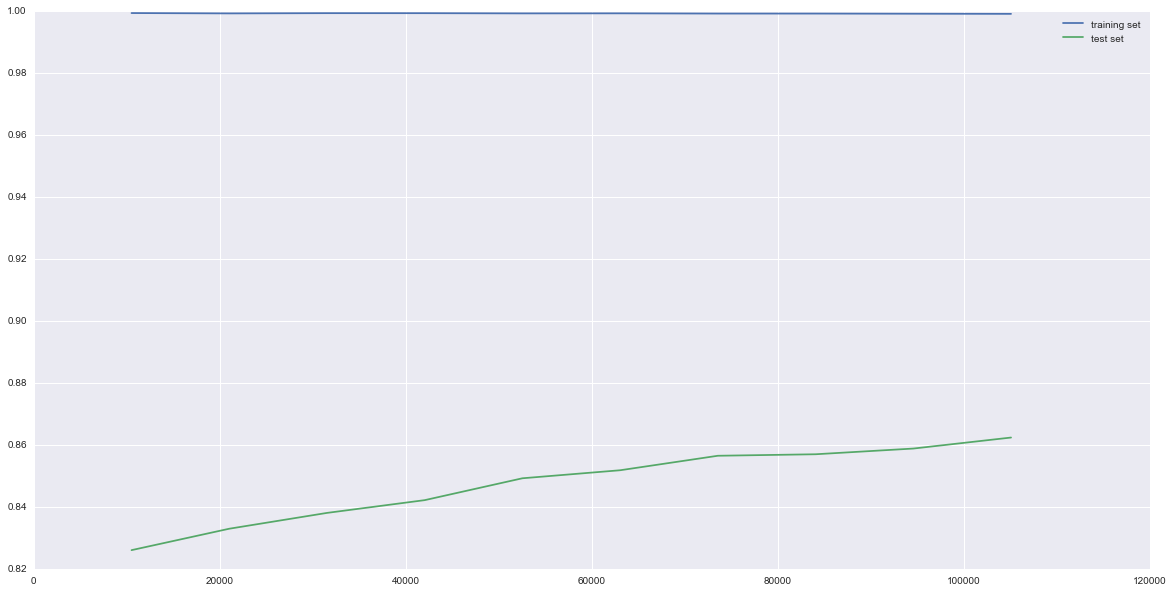

In [184]:
plt.plot(training_examples,training_acc.mean(axis = 1),label='training set')
plt.plot(training_examples,test_acc.mean(axis = 1),label='test set')
plt.legend()
plt.show()

The above plot clearly indicates that the model has overfit the data as the accuracy of the training set is quite high and decreases slowly over increasing the data but the cv set accuracy is pretty low and doesnt have any sharp increase as the data size increases. (More data can help)

### Dropping people_char_38 in type 1 data

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157615 entries, 0 to 157614
Data columns (total 49 columns):
char_1            157615 non-null int8
char_2            157615 non-null int8
char_3            157615 non-null int8
char_4            157615 non-null int8
char_5            157615 non-null int8
char_6            157615 non-null int8
char_7            157615 non-null int8
char_8            157615 non-null int8
char_9            157615 non-null int8
outcome           157615 non-null int64
people_char_1     157615 non-null int8
people_group_1    157615 non-null int16
people_char_2     157615 non-null int8
people_char_3     157615 non-null int8
people_char_4     157615 non-null int8
people_char_5     157615 non-null int8
people_char_6     157615 non-null int8
people_char_7     157615 non-null int8
people_char_8     157615 non-null int8
people_char_9     157615 non-null int8
people_char_10    157615 non-null int8
people_char_11    157615 non-null int8
people_char_12    157615 non-

In [93]:
y = df1.outcome.values
print y.shape

(157615,)


In [96]:
df1.drop(labels=['people_char_38','outcome'],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157615 entries, 0 to 157614
Data columns (total 47 columns):
char_1            157615 non-null int8
char_2            157615 non-null int8
char_3            157615 non-null int8
char_4            157615 non-null int8
char_5            157615 non-null int8
char_6            157615 non-null int8
char_7            157615 non-null int8
char_8            157615 non-null int8
char_9            157615 non-null int8
people_char_1     157615 non-null int8
people_group_1    157615 non-null int16
people_char_2     157615 non-null int8
people_char_3     157615 non-null int8
people_char_4     157615 non-null int8
people_char_5     157615 non-null int8
people_char_6     157615 non-null int8
people_char_7     157615 non-null int8
people_char_8     157615 non-null int8
people_char_9     157615 non-null int8
people_char_10    157615 non-null int8
people_char_11    157615 non-null int8
people_char_12    157615 non-null int8
people_char_13    157615 non-n

In [97]:
from sklearn.cross_validation import train_test_split
X = df1.values
print X.shape
X_train,X_cv,y_train,y_cv = train_test_split(X,y,test_size=0.33)
print X_train.shape,y_train.shape
print X_cv.shape,y_cv.shape

(157615, 47)
(105602, 47) (105602,)
(52013, 47) (52013,)


In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,max_depth=35,max_features=1.00)

In [99]:
rfc.fit(X_train,y_train)
print 'Training Set Accuracy: {}%'.format(rfc.score(X_train,y_train)*100)

Training Set Accuracy: 99.9422359425%


In [100]:
print 'Cross Validation Set Accuracy: {}%'.format(rfc.score(X_cv,y_cv)*100)

Cross Validation Set Accuracy: 94.5225232154%


In [103]:
from sklearn.learning_curve import learning_curve
curve = learning_curve(rfc,X,y,train_sizes = [i for i in np.arange(0.1,1.1,0.1)],cv = 3,verbose=2)

[learning_curve] Training set sizes: [ 10507  21015  31522  42030  52538  63045  73553  84060  94568 105076]
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   4.0s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -   8.2s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  13.0s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  18.2s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  22.6s
[CV] no parameters to be set .........................................
[CV] ................................ no parameters to be set -  29.9s
[CV] no parameters to be set ..........

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.7min finished


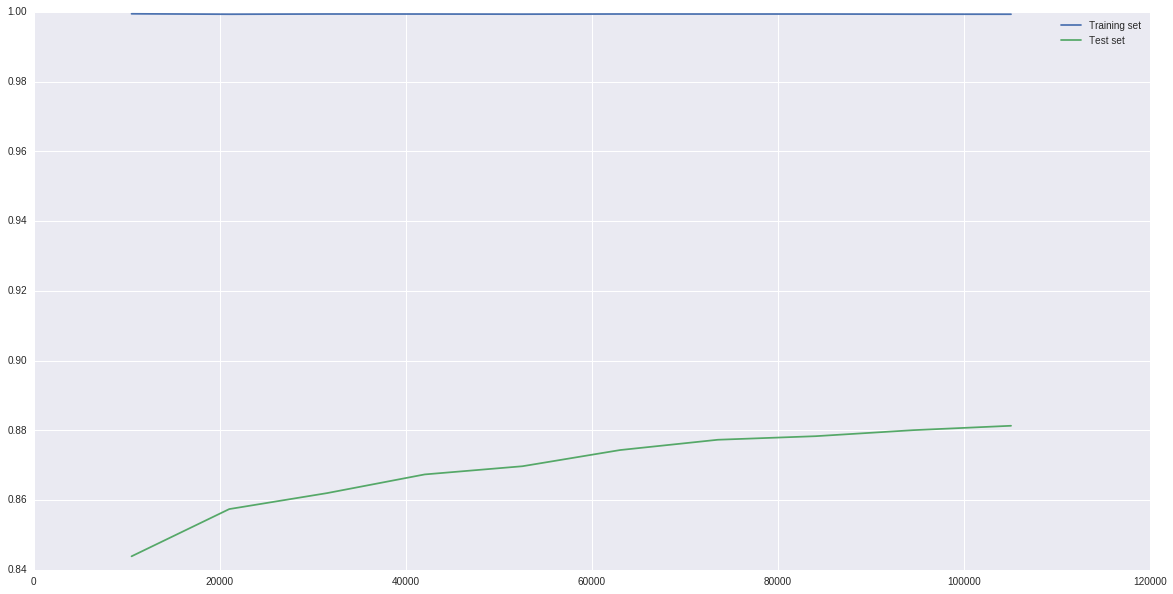

In [109]:
plt.plot(curve[0],np.mean(curve[1],axis=1),label='Training set')
plt.plot(curve[0],np.mean(curve[2],axis=1),label='Test set')
plt.legend()